In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from util import *


# PATH_WINDOWS = '..\\data\\round1\\prices_round_'
# PATH_LINUX = '..\data\round1\prices_round_'
PATH_MAC_PRICES = '/Users/albertyang/Desktop/IMC_Prosperity/data/round-1-island-data-bottle/prices_round_'
PATH_MAC_TRADES = '/Users/albertyang/Desktop/IMC_Prosperity/data/round-1-island-data-bottle/trades_round_'

path_prices = PATH_MAC_PRICES
path_trades = PATH_MAC_TRADES
round = 1

data0_prices = pd.read_csv(filepath_or_buffer = f'{path_prices}{round}_day_0.csv', sep=';')
data1_prices = pd.read_csv(filepath_or_buffer = f'{path_prices}{round}_day_-1.csv', sep=';')
data2_prices = pd.read_csv(filepath_or_buffer = f'{path_prices}{round}_day_-2.csv', sep=';')

data0_trades = pd.read_csv(filepath_or_buffer = f'{path_trades}{round}_day_0.csv', sep=';')
data1_trades = pd.read_csv(filepath_or_buffer = f'{path_trades}{round}_day_-1.csv', sep=';')
data2_trades = pd.read_csv(filepath_or_buffer = f'{path_trades}{round}_day_-2.csv', sep=';')

In [2]:
asset = 'SQUID_INK'


data_0_prices = data0_prices.loc[data0_prices['product'] == asset]
data_1_prices = data1_prices.loc[data1_prices['product'] == asset]
data_2_prices = data2_prices.loc[data2_prices['product'] == asset]

data_0_trades = data0_trades.loc[data0_trades['symbol'] == asset]
data_1_trades = data1_trades.loc[data1_trades['symbol'] == asset]
data_2_trades = data2_trades.loc[data2_trades['symbol'] == asset]

In [3]:
data_0_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
4,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6
8,500,NaN,NaN,SQUID_INK,SEASHELLS,1970.0,1
10,1300,NaN,NaN,SQUID_INK,SEASHELLS,1970.0,2
11,1300,NaN,NaN,SQUID_INK,SEASHELLS,1968.0,5
13,1400,NaN,NaN,SQUID_INK,SEASHELLS,1969.0,1
...,...,...,...,...,...,...,...
8171,998500,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,10
8173,998700,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,1
8176,998800,NaN,NaN,SQUID_INK,SEASHELLS,1831.0,1
8179,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2


In [4]:
data_0_prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
6,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN,1967.5,0.0
9,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN,1966.5,0.0
14,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN,1967.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0
29989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0
29993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0
29994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0


In [5]:
plot_xy(
    get_column(data_0_trades, 'timestamp'),
    get_column(data_0_trades, 'price'),
)

In [8]:
plot_xyxy(
    get_column(data_0_trades, 'timestamp'),
    get_column(data_0_trades, 'price'),
    get_column(data_1_prices, 'timestamp'),
    calculate_weighted_mid(data_0_prices),
    x_label='timestamp',
    y_label='price',
    y2_label='weighted_mid_price',
)


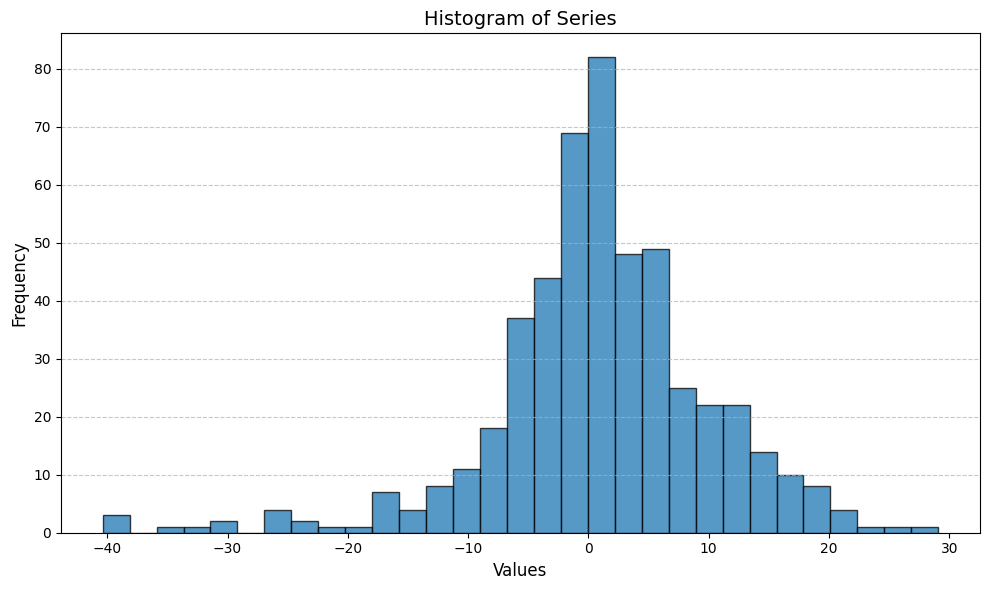

<Axes: title={'center': 'Histogram of Series'}, xlabel='Values', ylabel='Frequency'>

In [7]:
sm_trades_mid = smooth_series_fixed_length(
    get_column(data_0_trades, 'price'), 500)

sm_prices_mid = smooth_series_fixed_length(calculate_weighted_mid(data_0_prices), 500)

plot_xy(sm_trades_mid, sm_prices_mid)
plot_histogram_from_series(sm_prices_mid - sm_trades_mid)

